In [99]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from copy import deepcopy
from math import pi, sqrt
sys.path.append('..\\zeros_of_functions\\')

from Functions import Func
from points_Interpolation import Interpolate

In [100]:


def plot_curve (func: 'Func', axe: 'plt.Axes', interval_x: list, interval_y: list,
                step: float = 0.1, color_val: str = 'b', label_txt: str = '') -> None:    
    """
    Function to plot a given expression curve in a certain interval
    """    
    
    # Create the values of X in the interval
    x_np = np.arange(*interval_x, step)

    # Limit the graph to improve visualization of the curve
    
    axe.set(xlim= interval_x, ylim = interval_y)

    # Plots it
    axe.plot(x_np, func(x_np), color=color_val, label=label_txt)
    axe.legend()

def plot_cartesian_lines (axe, interval_x: list, interval_y: list):
    # plots the x and y lines in black in the axe.
    if not interval_y[1]:
        interval_y = [-10, 10]

    if not interval_x[1]:
        interval_x = [-10, 10]
        
    x_np = np.arange(*interval_x, 0.1)
    y_np = np.arange(*interval_y, 0.1)

    axe.plot(x_np, [0 for  _ in x_np], c='black', label='x')
    axe.plot([0 for _ in y_np], y_np, c='black', label='y')

def plot_func_in_cartesian (func: 'Func', axe: 'plt.Axes', interval_x: list):
    """
    Function used to plot the graph of any function in the cartesian plan.
    in a given x interval
    """

    inter_x, inter_y = intervals(
        interval_x,
        [func.global_max_min('min'), func.global_max_min('max')]
    )

    # Plots the abcisse and ordinate lines
    plot_cartesian_lines(axe, inter_x, inter_y)

    # Plots the function curve
    plot_curve(func, axe, inter_x, inter_y, label_txt='f(x)')
    

def plot_points (x_coordinates: list, y_coordinates: list, axe: 'plt.Axes',
                 marker:str = '.', color_val: str='black', label_txt: str = ''):
    """
    Functions to plot a given array of points.
    """
    
    axe.scatter (x_coordinates, y_coordinates, marker=marker,
                 color = color_val, label = label_txt )
    
def intervals (x_coordinates: list, y_coordinates: list) -> list:
    """
    Function that calculates the best interval to make sure all the
    points will be shown with a good visualization.
    """


    max_x, max_y = max(x_coordinates), max(y_coordinates)

    min_x, min_y = min(x_coordinates), min(y_coordinates)

    # By tests, I found out that 0.75 of the whole interval is the best increment
    # to improve the visualization of the data.
    increment_x = ((max_x - min_x)/len(x_coordinates)) * 0.75
    increment_y = ((max_y - min_y)/len(y_coordinates)) * 0.75

    x_interval = [min_x - increment_x, max_x + increment_x]
    y_interval = [min_y - increment_y, max_y + increment_y]

    return [x_interval, y_interval]


C:\Users\vibar\AppData\Local\Temp\ipykernel_2404\1087755710.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


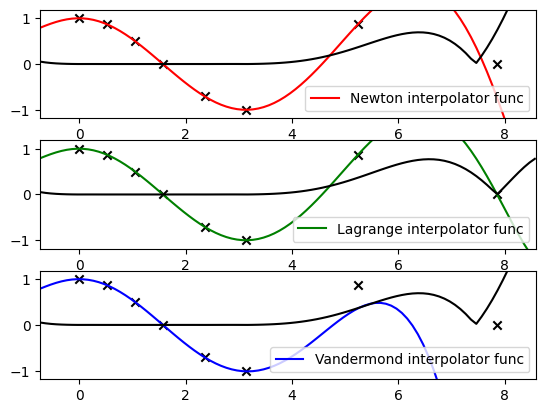

In [101]:
    
points_1 = [
    (0, 1),
    (1, 6),
    (2, 5),
    (3, -8),
]

points_2 = [
    (-1, 1.6988),
    (-0.4, 1.6916),
    (-0.2, 1.8214),
    (0, 2),
    (0.3, 2.3408),
    (1, 3.3817),
]

points_3 = [
    (0, 1), (pi/6, 0.866025), (pi/3, 0.5), (pi/2, 0), (pi, -1),
    (3*pi/4, -0.7071067811865), (5*pi/3, 0.866025),
    (5*pi/2, 0),
]

interpolator = Interpolate(points_3)

vandermond_func = interpolator.vandermond_method()
lagrange_func = interpolator.lagrange_method()
newton_func = interpolator.newton_method()

funcs = [newton_func, lagrange_func, newton_func]

fig, axe = plt.subplots(3)

interval_x, interval_y = intervals(interpolator.x_values, interpolator.y_values)


plot_curve(newton_func, axe[0], interval_x, interval_y, color_val='r', label_txt='Newton interpolator func')
plot_points(interpolator.x_values, interpolator.y_values, axe[0], marker='x')

plot_curve(lagrange_func, axe[1], interval_x, interval_y, color_val='green', label_txt='Lagrange interpolator func')
plot_points(interpolator.x_values, interpolator.y_values, axe[1], marker='x')

plot_curve(vandermond_func, axe[2], interval_x, interval_y, color_val='blue', label_txt='Vandermond interpolator func')
plot_points(interpolator.x_values, interpolator.y_values, axe[2], marker='x')

def error (func_ref, func_inter, x):
    return  abs(func_ref(x) - func_inter(x))


x_np = np.arange(*interval_x, 0.1)

for i, axis in enumerate(axe):
    axis.plot(x_np, error(np.cos, funcs[i], x_np), color='black')

fig.show()



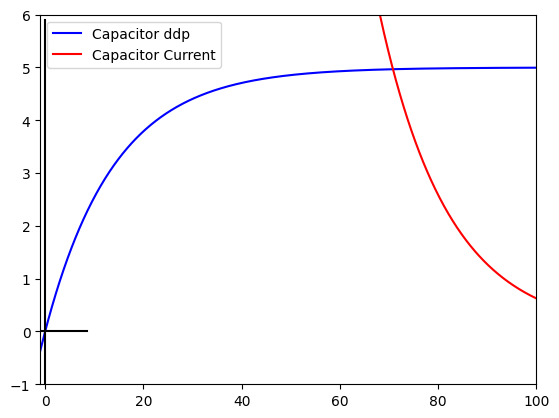

In [107]:


x = sym.symbols('x')

V = 5
R = 30 * 10**3
C = 470 * 10 **(-6)

Vc_func = Func(
    V *(1 - sym.exp(-(1/(R*C)) * x)),
    x
)

Ic_func = Func(
    (1/C)*Vc_func.dfunc(),
    x
)
fig, axe = plt.subplots()

invetrval_x, interval_y = [-1, 100], [-1, 6]

plot_curve(Vc_func, axe, invetrval_x, interval_y, label_txt='Capacitor ddp')
plot_curve(Ic_func, axe, invetrval_x, interval_y, color_val='r', label_txt='Capacitor Current')

plot_cartesian_lines(axe, interval_x, interval_y)




